In [2]:
import pandas as pd

In [3]:
PATH = "./train_data.csv"

In [4]:
df = pd.read_csv(PATH)

In [5]:
df.head()

,timestamp,lon,lat,likescount,commentscount,symbols_cnt,words_cnt,hashtags_cnt,mentions_cnt,links_cnt,emoji_cnt,point
0,1565607600,30.329370,59.940488,63,4,52,6,0,0,0,0,0101000020E6100000DBC1F19351543E4006FC5DE561F8...
1,1565568000,30.342845,59.869542,44,0,40,0,4,0,0,0,0101000020E6100000544263A8C4573E40C27FCF284DEF...
2,1565568000,30.322632,60.039332,30,0,77,7,0,0,0,1,0101000020E61000009E01B90998523E40888919D70805...
3,1565568000,30.322632,59.938238,13,0,634,17,32,0,0,7,0101000020E61000009E01B90998523E40CEB8CE2B18F8...
4,1565568000,30.309158,59.932612,8,0,0,0,0,0,0,0,0101000020E6100000268147F5244F3E40494A4ED65FF7...


In [41]:
print(df.shape)

(8526526, 12)


<Axes: >

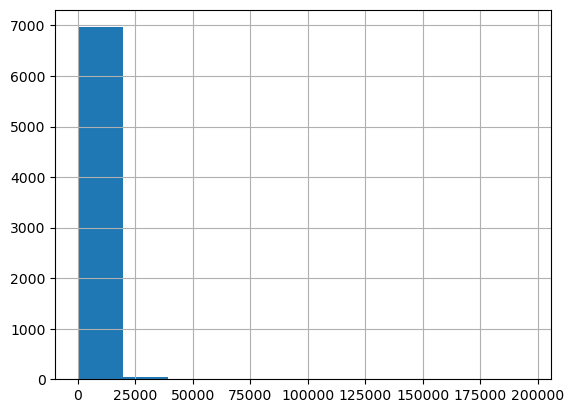

In [43]:
df.point.value_counts().hist()

In [28]:
# For each point hash there is single lon-lat position

df.groupby("point").apply(lambda x: len(x[["lon", "lat"]].drop_duplicates()))

count    7041.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
dtype: float64

<Axes: >

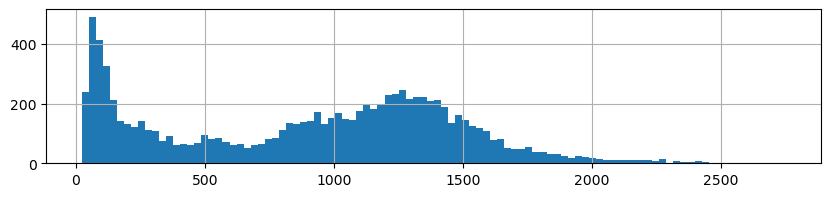

In [15]:
df.timestamp.value_counts().hist(bins=100, figsize=(10,2))

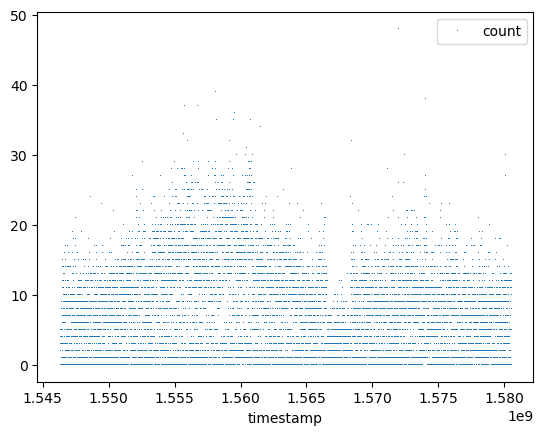

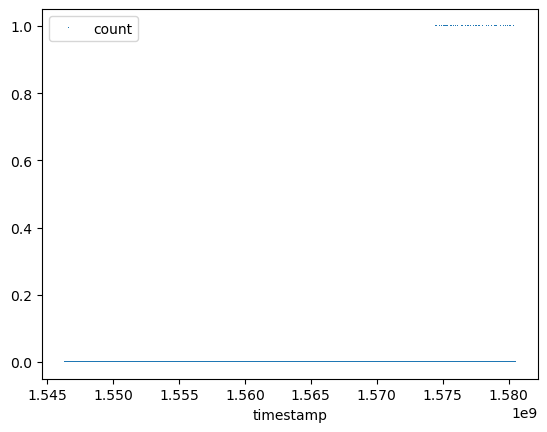

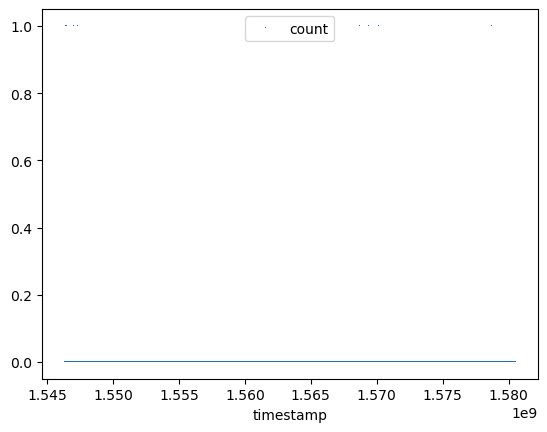

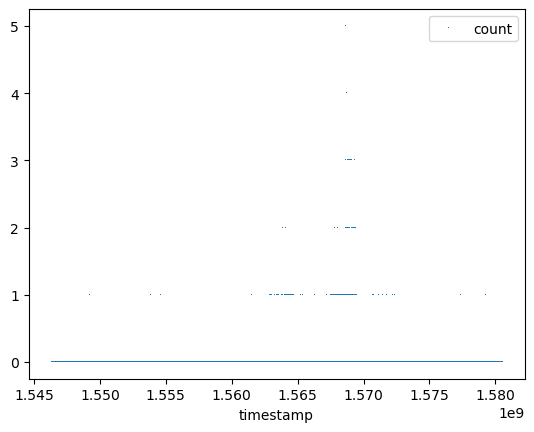

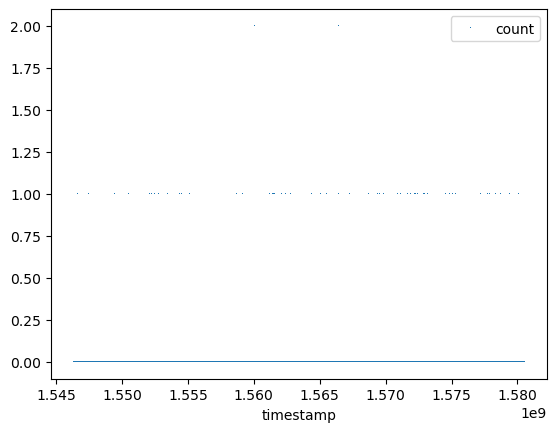

In [61]:
import matplotlib.pyplot as plt

N = 5

i = 0
for _, g in df.groupby("point"):
    n_posts = g.groupby("timestamp").apply(lambda x: len(x))
    df[["timestamp",]]\
        .merge(n_posts.to_frame("count"), "left", "timestamp")\
        .fillna(0)\
        .set_index("timestamp", drop=True)\
        .sort_index()\
        .plot(ls="", marker=",")
    plt.show()
    i += 1
    if i == N:
        break